# Week 9: Clustering analysis

# Rasika Bhalerao

# Agenda

- Make dataset
- KMeans clustering
- Determing "good" clusters
- Agglomerative hierarchical clustering
- Dendrograms

Parts are based loosely off [notebooks by Cornelia Ilin](https://github.com/MIDS-W207/cilin-coursework/tree/master/live_sessions)

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import multivariate_normal
from sklearn import cluster, datasets, mixture

In [ ]:
# Create nice, clumpy dataset for clustering

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

for i in range(5):
  print(f'X: {X[i]} y: {y[i]}')

X: [2.60509732 1.22529553] y: 1
X: [0.5323772  3.31338909] y: 0
X: [0.802314   4.38196181] y: 0
X: [0.5285368  4.49723858] y: 0
X: [2.61858548 0.35769791] y: 1


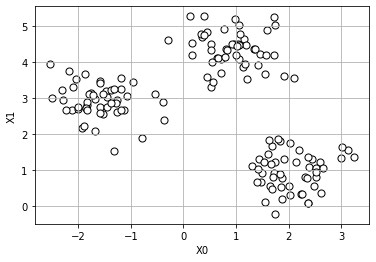

In [ ]:
plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50);
plt.xlabel('X0')
plt.ylabel('X1')
plt.grid()

In [ ]:
# KMeans clustering

n = 8

km = KMeans(
    n_clusters=n,
    # n_init=10,
    # max_iter=300,
    # tol=1e-04,
    # init='k-means++'
)

# fit the KMeans object and then predict class for each item in X
y_km = km.fit_predict(X)

y_km

array([0, 2, 7, 6, 5, 7, 7, 5, 1, 7, 0, 4, 1, 2, 6, 1, 4, 5, 4, 5, 2, 0,
       2, 7, 4, 5, 0, 2, 1, 3, 1, 1, 4, 1, 6, 3, 0, 3, 2, 7, 4, 4, 6, 5,
       3, 5, 4, 2, 4, 2, 3, 6, 7, 5, 0, 4, 2, 0, 4, 7, 1, 4, 1, 4, 2, 4,
       7, 3, 6, 6, 2, 3, 0, 6, 3, 2, 2, 4, 4, 7, 3, 5, 2, 7, 0, 0, 0, 1,
       1, 5, 5, 2, 3, 7, 3, 2, 1, 1, 3, 3, 3, 0, 1, 5, 3, 7, 1, 2, 7, 6,
       4, 2, 3, 4, 7, 1, 7, 2, 4, 1, 2, 0, 6, 6, 3, 3, 4, 5, 1, 4, 4, 4,
       3, 4, 1, 4, 2, 1, 3, 1, 7, 2, 5, 5, 4, 1, 1, 4, 5, 5], dtype=int32)

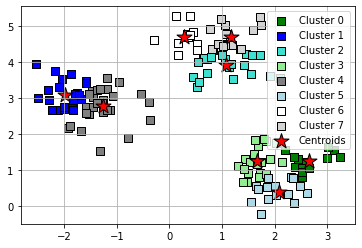

In [ ]:
# Visualize the predicted classes

colors = ['green', 'blue', 'turquoise', 'lightgreen', 'grey', 'lightblue', 'white', 'lightgrey']

for i in range(n):
  plt.scatter(X[y_km == i, 0],
            X[y_km == i, 1],
            s=50, c=colors[i],
            marker='s', edgecolor='black',
            label=f'Cluster {i}')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()

In [ ]:
# How do we measure if these are "good" clusters?

print('within-cluster SSE: %.2f' % km.inertia_)

within-cluster SSE: 35.10


Text(0, 0.5, 'within-cluster SSE')

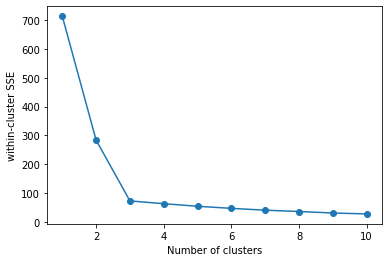

In [ ]:
# Within cluster SSE for different values of k

wc_SSE = [KMeans(n_clusters=k).fit(X).inertia_ for k in range(1,11)]

plt.plot(range(1,11), wc_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster SSE')

Why not just use the k with the smallest within-cluster SSE?

### Agglomerative clustering

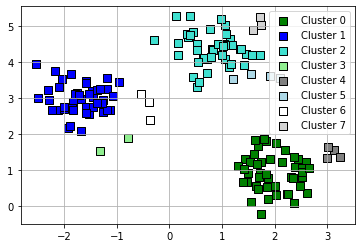

In [ ]:
n = 8

ac = AgglomerativeClustering(n_clusters=n,
                             affinity='euclidean',
                             linkage='average')
y_ac = ac.fit_predict(X)

for i in range(n):
  plt.scatter(X[y_ac == i, 0],
            X[y_ac == i, 1],
            s=50, c=colors[i],
            marker='s', edgecolor='black',
            label=f'Cluster {i}')

plt.legend(scatterpoints=1)
plt.grid()

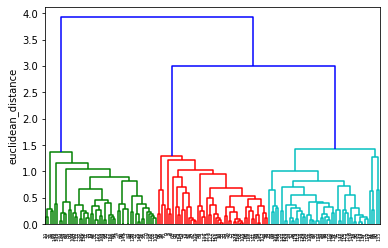

In [ ]:
clusters = linkage(
    pdist(
        pd.DataFrame(X)
    ),
    method='average'
)
row_dendr = dendrogram(clusters, labels=[str(i) for i in range(len(X))])
plt.ylabel('euclidean_distance');

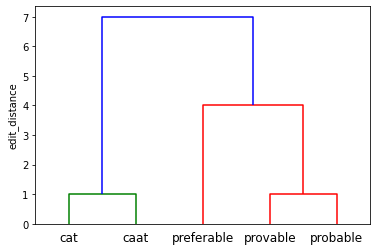

In [ ]:
# !pip install python-Levenshtein
from Levenshtein import distance

dataset = [
           'provable',
           'probable',
           'preferable',
           'cat',
           'caat'
]

def levenshtein_distance(idx1, idx2):
  return distance(dataset[idx1[0]], dataset[idx2[0]])

clusters = linkage(
    pdist(
        [[i] for i in range(len(dataset))],
        metric=levenshtein_distance
    ),
    method='single'
)
row_dendr = dendrogram(clusters, labels=dataset)
plt.ylabel('edit_distance');

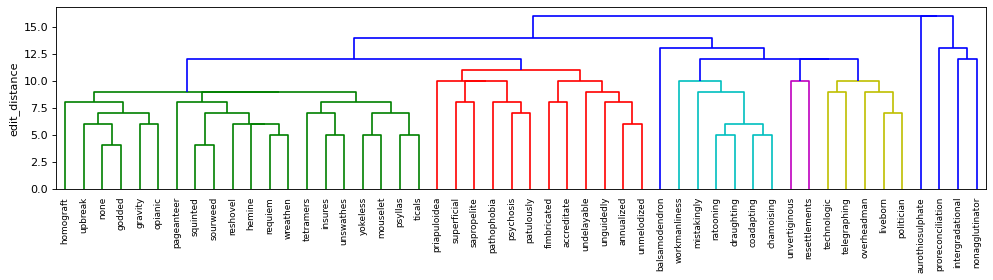

In [ ]:
# !pip install python-Levenshtein
from Levenshtein import distance

dataset = random.sample([word.strip() for word in open('words_alpha.txt', 'r').readlines()], 50)

def levenshtein_distance(idx1, idx2):
  return distance(dataset[idx1[0]], dataset[idx2[0]])

clusters = linkage(
    pdist(
        [[i] for i in range(len(dataset))],
        metric=levenshtein_distance
    ),
    method='complete'
)

plt.figure(figsize=(15, 3), dpi=80)
row_dendr = dendrogram(clusters, labels=dataset)
plt.ylabel('edit_distance');